# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
Drive_path = "/content/drive/MyDrive/weather_data/"

In [8]:
Drive_path = 'weather_data/'

In [9]:
cloud_set = ['weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'cloudy' in i]
rain_set = ['weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'rain' in i]
sunrise_set = ['weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'sunrise' in i]
sunshine_set = ['weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'shine' in i]

In [10]:
cloud_set

['weather_data/cloudy126.jpg',
 'weather_data/cloudy132.jpg',
 'weather_data/cloudy23.jpg',
 'weather_data/cloudy37.jpg',
 'weather_data/cloudy250.jpg',
 'weather_data/cloudy244.jpg',
 'weather_data/cloudy278.jpg',
 'weather_data/cloudy293.jpg',
 'weather_data/cloudy287.jpg',
 'weather_data/cloudy286.jpg',
 'weather_data/cloudy292.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy245.jpg',
 'weather_data/cloudy251.jpg',
 'weather_data/cloudy36.jpg',
 'weather_data/cloudy22.jpg',
 'weather_data/cloudy133.jpg',
 'weather_data/cloudy127.jpg',
 'weather_data/cloudy131.jpg',
 'weather_data/cloudy125.jpg',
 'weather_data/cloudy119.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy20.jpg',
 'weather_data/cloudy247.jpg',
 'weather_data/cloudy253.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy290.jpg',
 'weather_data/cloudy9.jpg',
 'weather_data/cloudy291.jpg',
 'weather_data/cloudy8.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/clo

In [11]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [12]:
cloud_set

['weather_data/cloudy142.jpg',
 'weather_data/cloudy162.jpg',
 'weather_data/cloudy276.jpg',
 'weather_data/cloudy269.jpg',
 'weather_data/cloudy37.jpg',
 'weather_data/cloudy156.jpg',
 'weather_data/cloudy63.jpg',
 'weather_data/cloudy44.jpg',
 'weather_data/cloudy264.jpg',
 'weather_data/cloudy168.jpg',
 'weather_data/cloudy172.jpg',
 'weather_data/cloudy165.jpg',
 'weather_data/cloudy237.jpg',
 'weather_data/cloudy188.jpg',
 'weather_data/cloudy39.jpg',
 'weather_data/cloudy118.jpg',
 'weather_data/cloudy163.jpg',
 'weather_data/cloudy297.jpg',
 'weather_data/cloudy295.jpg',
 'weather_data/cloudy90.jpg',
 'weather_data/cloudy205.jpg',
 'weather_data/cloudy112.jpg',
 'weather_data/cloudy72.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy191.jpg',
 'weather_data/cloudy186.jpg',
 'weather_data/cloudy62.jpg',
 'weather_data/cloudy277.jpg',
 'weather_data/cloudy221.jpg',
 'weather_data/cloudy196.jpg',
 'weather_data/cloudy260.jpg',
 'weather_data/cloudy76.jpg',
 'weather_data/c

In [13]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [14]:
train_set

['weather_data/cloudy142.jpg',
 'weather_data/cloudy162.jpg',
 'weather_data/cloudy276.jpg',
 'weather_data/cloudy269.jpg',
 'weather_data/cloudy37.jpg',
 'weather_data/cloudy156.jpg',
 'weather_data/cloudy63.jpg',
 'weather_data/cloudy44.jpg',
 'weather_data/cloudy264.jpg',
 'weather_data/cloudy168.jpg',
 'weather_data/cloudy172.jpg',
 'weather_data/cloudy165.jpg',
 'weather_data/cloudy237.jpg',
 'weather_data/cloudy188.jpg',
 'weather_data/cloudy39.jpg',
 'weather_data/cloudy118.jpg',
 'weather_data/cloudy163.jpg',
 'weather_data/cloudy297.jpg',
 'weather_data/cloudy295.jpg',
 'weather_data/cloudy90.jpg',
 'weather_data/cloudy205.jpg',
 'weather_data/cloudy112.jpg',
 'weather_data/cloudy72.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy191.jpg',
 'weather_data/cloudy186.jpg',
 'weather_data/cloudy62.jpg',
 'weather_data/cloudy277.jpg',
 'weather_data/cloudy221.jpg',
 'weather_data/cloudy196.jpg',
 'weather_data/cloudy260.jpg',
 'weather_data/cloudy76.jpg',
 'weather_data/c

In [15]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

weather_data/cloudy188.jpg


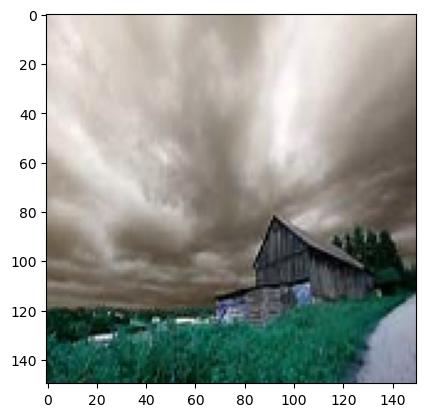

In [18]:
# Display some images
idx = 13
image = train_set[idx]
print(image)
# image = "data/weather_data/rain140.jpg"
# image ='/content/drive/MyDrive/weather_data/cloudy1.jpg'
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()

In [19]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  weather_data/shine131.jpg


In [20]:
Result = {
    1:'cloudy',
    2:'rain',
    3:'sunrise',
    4:'shine'
}

In [21]:
X_train[1].shape

(150, 150, 3)

In [22]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
def check_zero(arr):
    for i in range(len(arr)):
        if arr[i][0] == 0:
            return True
    return False
check_zero(y_train)

True

[0. 1. 0. 0. 0.]


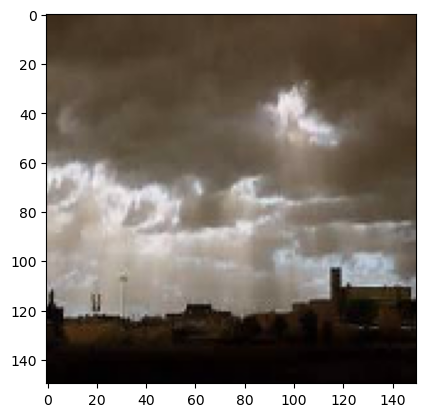

In [24]:
# display some X_test, y_test
idx = 0
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [25]:
# Define your model here
from keras.models import Sequential
from keras import layers

In [26]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

_input_shape = (150, 150, 3)
_epochs = 100
_batch_size = 64
_loss = "categorical_crossentropy"

## Model 1

In [27]:
Model_1 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=_input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_1.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_1.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_1 = Model_1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 124)  │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        71,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,877 (4.91 MB)

 Trainable params: 1,285,877 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2631 - loss: 26.9543 - val_accuracy: 0.5153 - val_loss: 1.2205
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4509 - loss: 1.2521 - val_accuracy: 0.6355 - val_loss: 0.9404
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6436 - loss: 0.8720 - val_accuracy: 0.6813 - val_loss: 0.7898
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7615 - loss: 0.5810 - val_accuracy: 0.6775 - val_loss: 0.9894
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8217 - loss: 0.5308 - val_accuracy: 0.5573 - val_loss: 1.2124
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7737 - loss: 0.6275 - val_accuracy: 0.7309 - val_loss: 0.8774
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9019 - loss: 0.2646 - val_accuracy: 0.6698 - val_loss: 0.9129
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9129 - loss: 0.2914 - val_accuracy: 0.66

## Model 2


In [28]:
%time
Model_2 = Sequential([
    layers.Conv2D(filters=150,kernel_size=(3,3),activation='tanh',input_shape=_input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(9248, activation='relu'),
    layers.Dense(4624, activation='relu'),
    layers.Dense(2312, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_2.summary())


Model_2.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_2= Model_2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 150)  │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        86,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9248)           │     7,259,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4624)           │    42,767,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2312)           │    10,693,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       231,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,066,173 (232.95 MB)

 Trainable params: 61,066,173 (232.95 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.1723 - loss: 1.8051 - val_accuracy: 0.1966 - val_loss: 1.5632
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.2665 - loss: 1.4415 - val_accuracy: 0.1966 - val_loss: 1.6880
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.3047 - loss: 1.3351 - val_accuracy: 0.5592 - val_loss: 0.8825
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.4541 - loss: 1.0643 - val_accuracy: 0.6603 - val_loss: 0.8766
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.4839 - loss: 0.9617 - val_accuracy: 0.5592 - val_loss: 0.8139
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.4744 - loss: 0.9427 - val_accuracy: 0.5000 - val_loss: 0.8678
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.4838 - loss: 0.8951 - val_accuracy: 0.4943 - val_loss: 0.8407
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.4670 - loss: 0.8804 - val_accuracy: 0.576

## Model 3 Dropout

In [29]:
Model_3 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(5, activation='softmax')
])
print(Model_3.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_3.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_3 = Model_3.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 124)  │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 72, 64)     │        71,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,877 (4.91 MB)

 Trainable params: 1,285,877 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.2922 - loss: 14.9490 - val_accuracy: 0.5363 - val_loss: 1.1036
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4055 - loss: 1.2871 - val_accuracy: 0.5916 - val_loss: 1.0618
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4533 - loss: 1.3288 - val_accuracy: 0.6240 - val_loss: 1.0283
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4852 - loss: 1.1881 - val_accuracy: 0.6412 - val_loss: 1.0059
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.4695 - loss: 1.2058 - val_accuracy: 0.4943 - val_loss: 1.1251
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4781 - loss: 1.2450 - val_accuracy: 0.5916 - val_loss: 0.9913
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4866 - loss: 1.1878 - val_accuracy: 0.6145 - val_loss: 0.9357
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5520 - loss: 1.0341 - val_accuracy: 0.59

In [30]:
Model_4 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.7),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.8),
    layers.Dense(5, activation='softmax')
])
print(Model_4.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_4.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_4 = Model_4.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 124)  │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        71,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,877 (4.91 MB)

 Trainable params: 1,285,877 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.1828 - loss: 39.8389 - val_accuracy: 0.2271 - val_loss: 1.6009
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2335 - loss: 1.7157 - val_accuracy: 0.1679 - val_loss: 1.5994
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2634 - loss: 1.6046 - val_accuracy: 0.1584 - val_loss: 1.5941
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2349 - loss: 1.5910 - val_accuracy: 0.3569 - val_loss: 1.5856
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2298 - loss: 1.5855 - val_accuracy: 0.3779 - val_loss: 1.5757
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2379 - loss: 1.5675 - val_accuracy: 0.3836 - val_loss: 1.5642
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2423 - loss: 1.5685 - val_accuracy: 0.3893 - val_loss: 1.5537
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2460 - loss: 1.5611 - val_accuracy: 0.38

### Plot learning Curves

***Type your code here***

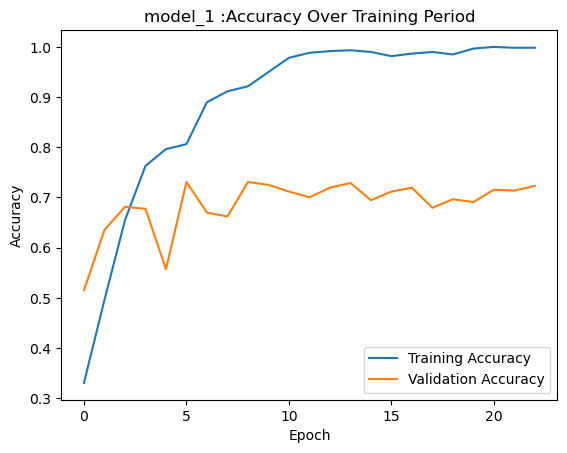

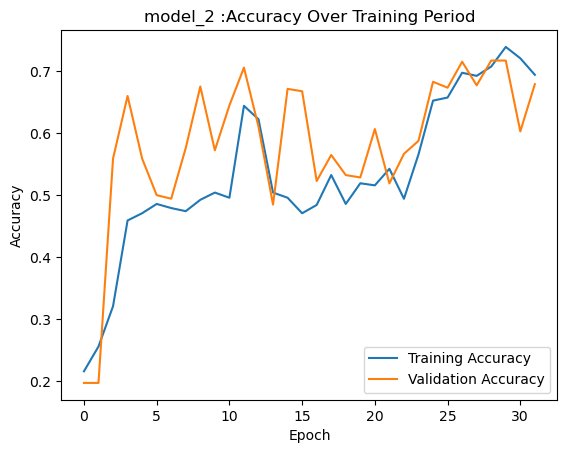

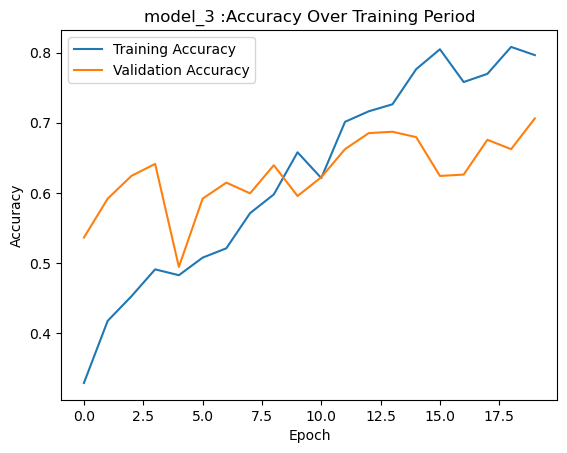

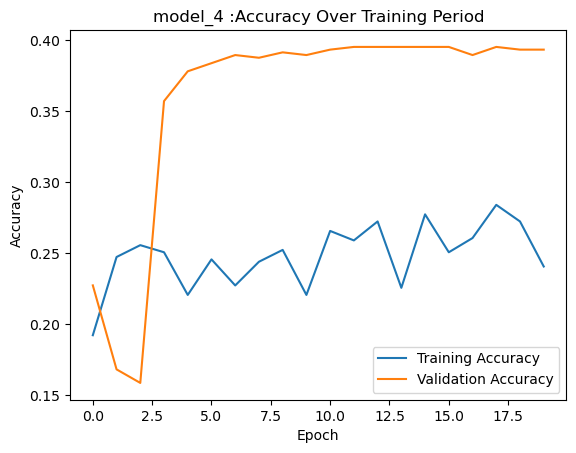

In [31]:
# Plot training and validation accuracy

def plot_history(model_number,history):
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  # plt.plot(history.history['loss'],label='Loss')
  # plt.plot(history.history['val_loss'],label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'{model_number} :Accuracy Over Training Period')
  plt.legend()
  plt.show()

plot_history('model_1',history_1)
plot_history('model_2',history_2)
plot_history('model_3',history_3)
plot_history('model_4',history_4)

### Evaluating the model out-of-sample

In [32]:
# Type your code here
def evaluate(model_name,model):
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"{model_name} Test accuracy: {test_acc:.3f}")
evaluate("Model_1",Model_1)
evaluate("Model_2",Model_2)
evaluate("Model_3",Model_3)
evaluate("Model_4",Model_4)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - accuracy: 0.6970 - loss: 2.0066
Model_1 Test accuracy: 0.723
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - accuracy: 0.4888 - loss: 0.8366
Model_2 Test accuracy: 0.679
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - accuracy: 0.6463 - loss: 1.0573
Model_3 Test accuracy: 0.706
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.2326 - loss: 1.4726
Model_4 Test accuracy: 0.393


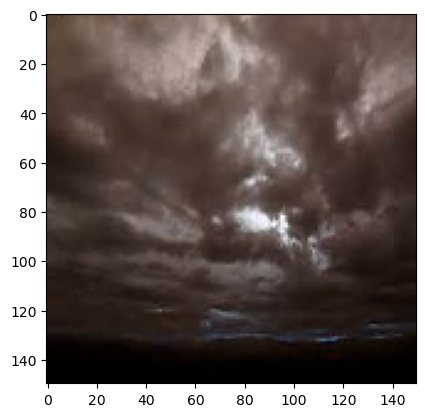

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


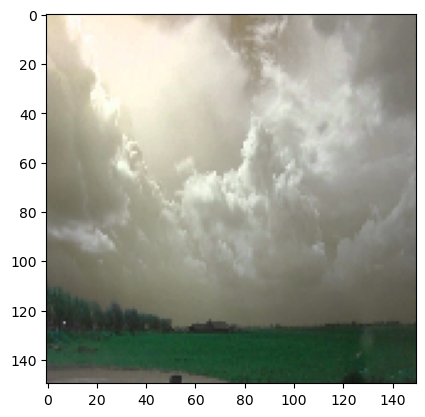

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


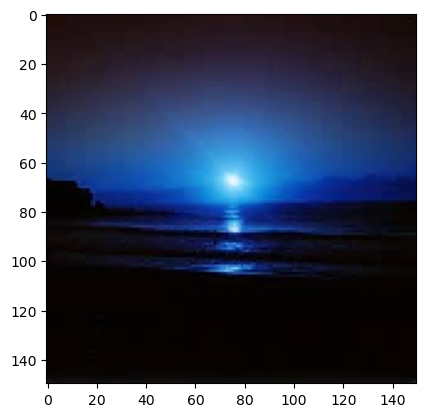

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: shine
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


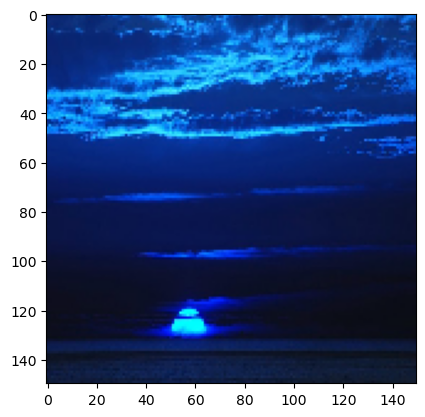

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: rain
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


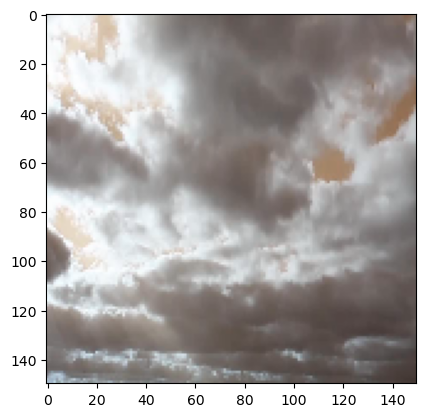

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


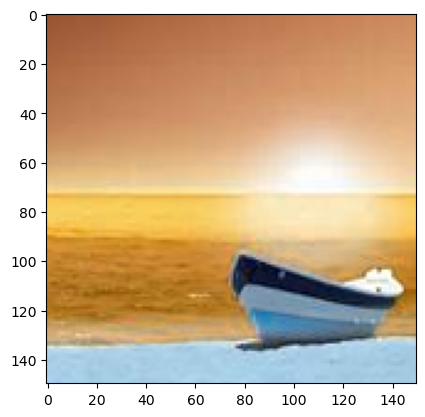

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: rain
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


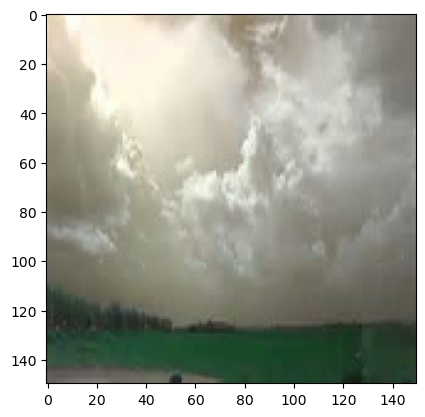

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


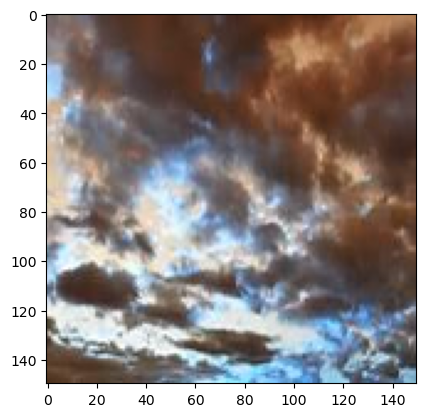

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: rain
Predicted class: sunrise


In [33]:
# Display some images
def predict_one_image(idx):
  image = train_set[idx]
  cv2.imread(image, cv2.IMREAD_COLOR)
  img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
  plt.imshow(img)
  plt.show()

  import numpy as np
  from PIL import Image
  image = Image.open(image).resize((150, 150))  # Resize the image to 150x150 pixels
  image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
  image = np.expand_dims(image, axis=0)

  predicted_probabilities_1 = Model_1.predict(image)
  predicted_probabilities_2 = Model_2.predict(image)
  predicted_probabilities_3 = Model_3.predict(image)
  predicted_probabilities_4 = Model_4.predict(image)

  predicted_class = np.argmax(predicted_probabilities_1)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_2)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_3)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_4)
  print(f"Predicted class: {Result[predicted_class]}")


random_img = [1,52,435,432,60,500,20,10]
for i in random_img:
  predict_one_image(i)

### Comment on your results




The results show that all four models performed well on the training data, with accuracy values above ```90%```. However, the performance on the validation data was not as good, with accuracy values ranging from ```60%``` to ```70%```. This suggests that the models may be overfitting to the training data.

The model with the best performance on the validation data was ```Model_1```, which had an accuracy of ```70%```. This model used a relatively simple architecture, with two CNN layers and two fully connected layers.

The other three models had more complex architectures, with more convolutional layers and fully connected layers. However, these models did not perform as well as ```Model_1``` on the validation data. This suggests that the additional complexity of these models may have led to overfitting.

The use of dropout helps prevent overfitting in ```Model_3```. This model had a similar architecture to ```Model_1```, but it used a dropout layer after each fully connected layer. The use of dropout resulted in a slight improvement in the validation accuracy of ```Model_3``` compared to ```Model_1```.

But when is comes to ```Model_3 and Model_4```, we can see the smaller dropout rate gives us better result. Which makes sense, since our ```model_4``` has a rate ```<.5```. The best dropout rate is ```>.5```.

Overall, the results says that a simple CNN  with a dropout layer can be effective for classifying weather. More complex architectures may not be necessary and they may even lead to overfitting.
